# 04 - Análisando Hipóteses

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## 04.01 O PNI está vacinando em maior ou menor quantidade nos últimos 4 anos?

Para analisarmos essa hipotése podemos olhar tanto para os dados de Cobertura Vacinal quanto para os dados de Doses aplicadas. Vamos analisar primeiramente através da Cobertura Vacinal.

In [2]:
cv_por_uf_ano = pd.read_csv("../dados/dados limpos/cv_por_uf_ano.csv")
cv_por_uf_ano = cv_por_uf_ano.set_index("Unidade da Federação")
cv_por_uf_ano.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,83.33,93.26,82.31,79.59,83.70,78.18,72.30,81.87,80.75,84.44,...,79.26,92.75,85.82,76.72,98.18,111.27,63.77,80.74,82.45,51.44
12 Acre,67.56,66.38,85.61,66.79,76.77,81.66,77.54,80.21,72.09,70.66,...,76.32,84.74,74.35,58.87,59.29,75.54,46.91,62.18,67.44,45.44
13 Amazonas,72.01,70.62,72.19,70.91,70.68,70.98,64.77,72.14,73.67,74.81,...,73.30,80.09,79.18,67.06,77.14,94.95,48.27,65.33,69.82,49.97
14 Roraima,80.26,97.45,93.76,83.94,72.67,78.33,72.99,80.28,78.26,74.22,...,75.19,84.42,73.13,60.70,82.30,105.27,57.41,74.26,78.76,48.04
15 Pará,67.09,67.46,82.95,77.23,83.43,82.66,80.50,97.38,89.17,86.99,...,81.55,84.11,77.87,67.91,71.71,67.51,41.43,57.60,57.44,37.53


Vamos plotar um gráfico para todo o país com a Média de Cobertura Vacinal ao longo do tempo, também vamos adicionar uma linha vermlha representando a média de todos os anos.

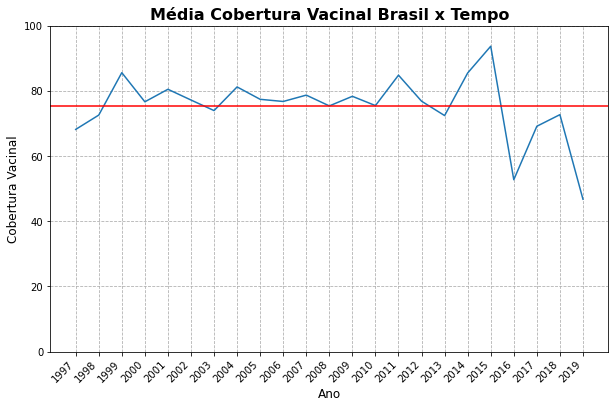

In [3]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=cv_por_uf_ano.mean())
ax.axhline(cv_por_uf_ano.mean().mean(), color="red")
plt.title("Média Cobertura Vacinal Brasil x Tempo", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("Ano", fontdict = {"fontsize":12})
plt.xticks(rotation=45, ha="right")
plt.ylabel("Cobertura Vacinal", fontdict = {"fontsize":12})
plt.ylim(0, 100)
plt.grid(linestyle='--')
plt.show()

Podemos ver no gráfico que nos últimos 4 anos a média da Cobertura Vacinal caiu bastante, desde 2016 estamos com uma média de cobertura abaixo da linha vermelha, ou seja, abaixo da média de todos os anos. Vamos ver se isso se repete com os dados da quantidade de doses.

In [4]:
doses_por_uf_ano = pd.read_csv("../dados/dados limpos/doses_por_uf_ano.csv")
doses_por_uf_ano = doses_por_uf_ano.set_index("Unidade da Federação")
doses_por_uf_ano.head()

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,221136,254228,511993,595405,634672,603409,567875,732052,698279,702254,...,647582,435345,427785,487788,664623,692060,619782,580329,554429,344707
12 Acre,78576,79331,240690,245193,281863,309201,300787,378766,353552,349014,...,375827,257132,240469,240916,254867,294119,259444,265563,266548,183891
13 Amazonas,427850,430178,1013496,1198384,1327220,1360736,1270370,1581187,1613814,1685221,...,1658753,1090240,1149204,1173912,1546920,1721877,1404249,1412102,1435823,996366
14 Roraima,51558,64159,139177,187080,162704,171102,168107,220949,210400,207007,...,216961,146403,134478,137917,223255,261569,223781,223177,237162,146819
15 Pará,890749,914640,2585184,2886309,3182573,3209151,3183958,4313926,3928530,4003528,...,3535221,2159285,2120596,2217128,2577588,2121121,1986047,2067185,1994916,1299432


Vamos plotar um gráfico parecido com o anterior, com a soma de todo o país ao longo do tempo, também vamos adicionar uma linha vermlha representando a média de todos os anos.

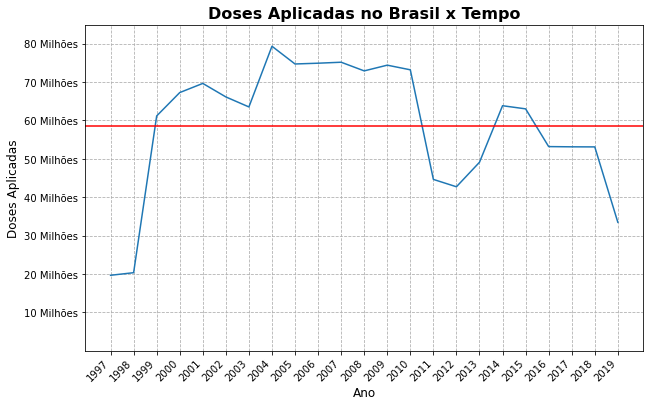

In [5]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=doses_por_uf_ano.sum())
ax.axhline(doses_por_uf_ano.sum().mean(), color="red")
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:,.0f}'.format(x) + ' Milhões' for x in ax.get_yticks()/1000000])
plt.ylim(0, 85000000)
plt.title("Doses Aplicadas no Brasil x Tempo", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("Ano", fontdict = {"fontsize":12})
plt.xticks(rotation=45, ha="right")
plt.ylabel("Doses Aplicadas", fontdict = {"fontsize":12})
plt.grid(linestyle='--')
plt.show()

O mesmo comportamento que vimos com a cobertura vacinal também se repete com a quantidade de doses aplicadas. Os últimos 4 anos do nosso gráfico está abaixo da média de todos os anos.

## 04.02 É possível notar um decrescimento nos casos da vacina mais aplicada no Brasil pelo PNI?

Primeiramente vamos ver qual a vacina mais aplicada no Brasil e ver qual a doença que ela combate.

In [7]:
imuno_cv_doses = pd.read_csv("../dados/dados limpos/imuno_cv_doses.csv")
imuno_cv_doses = imuno_cv_doses.set_index("Imuno")
imuno_cv_doses.head()

,Coberturas_Vacinais,Doses_Cáculos_CV
Imuno,,
072 BCG,105.82,81684240
099 Hepatite B em crianças até 30 dias,68.79,14067937
061 Rotavírus Humano,58.57,33391981
053 Meningococo C,61.23,24391126
073 Hepatite B,78.46,60563803


Vamos analisar primeira mente para a quantidade de doses aplicadas.

In [21]:
imuno_cv_doses = imuno_cv_doses.sort_values(by="Doses_Cáculos_CV", ascending=False)

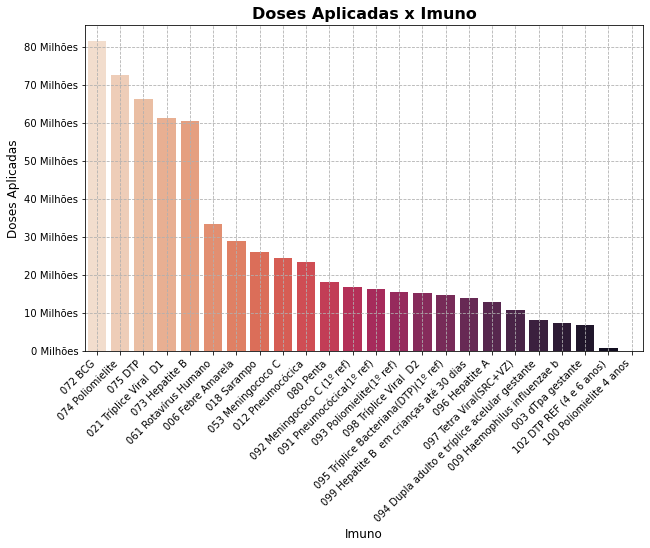

In [25]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data=imuno_cv_doses, x=imuno_cv_doses.index, y="Doses_Cáculos_CV", palette=sns.color_palette("rocket_r", 23))
ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(ticker.FixedLocator(ticks_loc))
ax.set_yticklabels(['{:,.0f}'.format(x) + ' Milhões' for x in ax.get_yticks()/1000000])
plt.title("Doses Aplicadas x Imuno", fontdict = {"fontsize":16, "fontweight":"bold"})
plt.xlabel("Imuno", fontdict = {"fontsize":12})
plt.xticks(rotation=45, ha="right")
plt.ylabel("Doses Aplicadas", fontdict = {"fontsize":12})
plt.grid(linestyle='--')
plt.show()

Com pouco mais de 80 milhões de doses aplicadas, a vacina BCG lidera o ranking. De acordo com o site da [Eurofarma](https://eurofarma.com.br/artigos/para-que-serve-a-vacina-bcg) a vacina BCG serve para combater doenças como a meningite tuberculosa e a tuberculose miliar.

<html>
<head>
<meta name="viewport" content="width=device-width, initial-scale=1">
</head>
<body>

<div style="text-align:center;">
  <a href="./03 - Análise Exploratória - Doses.ipynb">&laquo; Anterior</a>
</div>

  
</body>
</html> 